In [56]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU, ReLU, Dropout
from keras.optimizers import Adam, SGD

# hyperparameter
batch_size = 64
epochs = 20
classes = 10

import warnings
warnings.filterwarnings('ignore')

In [12]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

(10000, 28, 28, 1)

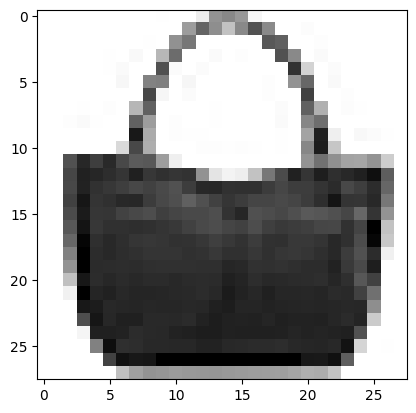

Số này là: 8


In [13]:
fashion = x_train[100]
plt.imshow(fashion, cmap = plt.cm.binary)
plt.show()
print('Số này là:', y_train[100])

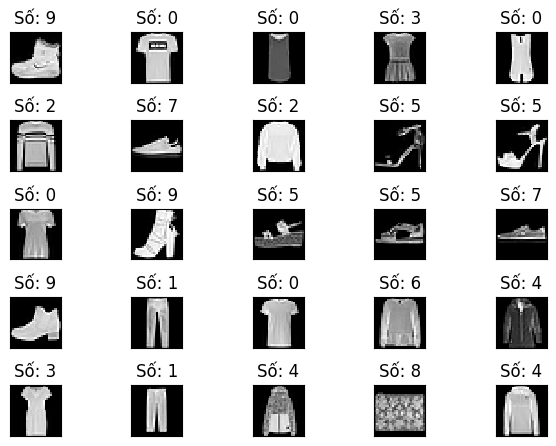

In [14]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap = 'gray', interpolation = 'none')
  plt.title('Số: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [16]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [27]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='linear',
                 input_shape=(28, 28, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

# 64
model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

# 128
model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

# Flatten
model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [36]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
train = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1401 - accuracy: 0.9475
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1287 - accuracy: 0.9510
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1227 - accuracy: 0.9534
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1160 - accuracy: 0.9554
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1109 - accuracy: 0.9581
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1041 - accuracy: 0.9608
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0983 - accuracy: 0.9618
Epoch 8/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0928 - accuracy: 0.9652
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0862 - accuracy: 0.9675
Epoch 10/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0866 - accuracy: 0.9664

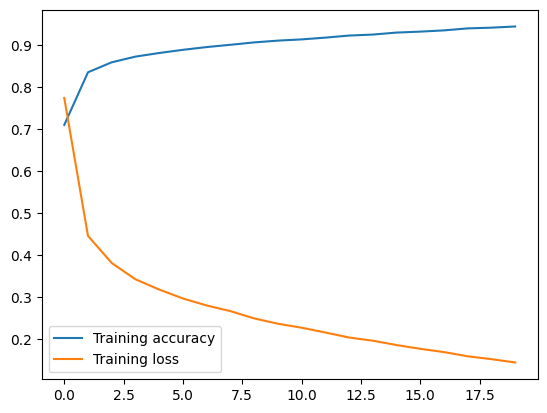

In [35]:
# model.save('model1.h5')
accuracy = train.history['accuracy']
loss = train.history['loss']
# plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
# plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(accuracy, label='Training accuracy')
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

# Cifar 10

In [42]:
import tensorflow as tf
batch_size = 64
epochs = 20

(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

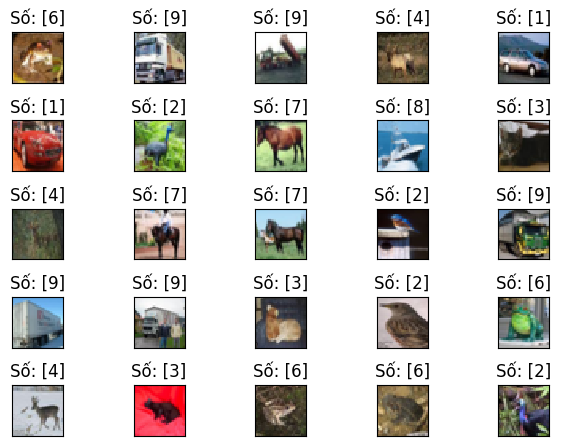

In [44]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap = 'gray', interpolation = 'none')
  plt.title('Số: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [45]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [65]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding = 'same', input_shape=(32,32,3)))
model.add(ReLU())
model.add(Conv2D(32,(3,3)))
model.add(ReLU())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,25))


model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(ReLU())
model.add(Conv2D(64,(3,3)))
model.add(ReLU())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,25))



model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 re_lu_26 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 re_lu_27 (ReLU)             (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 15, 15, 32)        0         
                                                     

In [70]:
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(loss= categorical_crossentropy, optimizer= sgd, metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
782/782 [==============================] - 6s 6ms/step - loss: 0.1967 - accuracy: 0.9279
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 0.1940 - accuracy: 0.9292
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1872 - accuracy: 0.9323
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1831 - accuracy: 0.9341
Epoch 5/20
782/782 [==============================] - 5s 7ms/step - loss: 0.1791 - accuracy: 0.9362
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1706 - accuracy: 0.9377
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.1667 - accuracy: 0.9388
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1630 - accuracy: 0.9403
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1564 - accuracy: 0.9429
Epoch 10/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1494 - accuracy: 0.9458

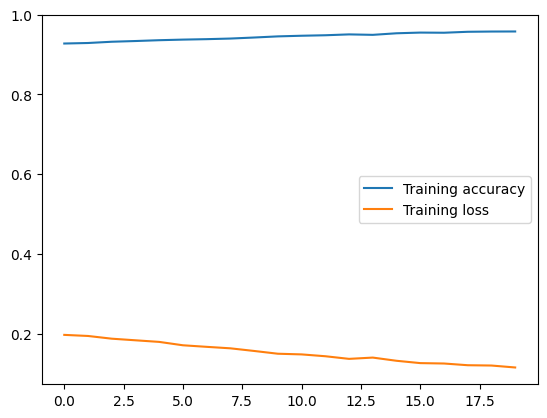

In [71]:
accuracy = train.history['accuracy']
loss = train.history['loss']
plt.plot(accuracy, label='Training accuracy')
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

In [96]:
import numpy as np

img = x_train[10]
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255
print('Predict',np.argmax(model.predict(img),axis = -1))
print("Real", np.argmax(y_train[10],axis = -1))


1/1 [==============================] - 0s 19ms/step
Predict [4]
Real 4


# Import folder

In [102]:
from os import listdir
from numpy import asarray, save
from tensorflow.keras.utils import  load_img, img_to_array

In [ ]:
folder = '/content/drive/MyDrive/yolov5/data/train_data/images/train/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('abcd'):
    output = 1.0
  if file.startswith('efgh'):
    output = 2.0

  photo = load_img(folder+file, target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
  photos = asarray(photos)
  labels = asarray(labels)
  print(photos.shape, labels.shape)
  save('/content/drive/MyDrive/Colab Notebooks/abcd.npy',photos)
  save('/content/drive/MyDrive/Colab Notebooks/efgh.npy',labels)
